### training the BrainAlignNet

In [5]:
import os
os.chdir("../../scripts")

In [2]:
from train import set_GPU, fit_deepreg
# import train

2025-02-11 20:47:46.856301: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-11 20:47:46.856347: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-11 20:47:46.857932: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
base = "/home/brian/notebooks/brian/PBrainAlign_and_Jelly/private_BrainAlignNet"
config_path = f"{base}/demo_notebook/demo_jelly_config.yaml"
log_dir = f"{base}/demo_notebook"
experiment_name = "test_jelly"
max_epochs = 5
initial_epoch = 1

In [4]:
base = "/home/brian/notebooks/brian/PBrainAlign_and_Jelly/private_BrainAlignNet"
config_path = f"{base}/demo_notebook/demo_jelly_config_mixedlabs.yaml"
log_dir = f"{base}/demo_notebook"
experiment_name = "test_jelly"
max_epochs = 300
initial_epoch = 1

In [2]:
base = "/home/brian/notebooks/brian/PBrainAlign_and_Jelly/private_BrainAlignNet"
config_path = f"{base}/demo_notebook/demo_data_config.yaml"
log_dir = f"{base}/demo_notebook"
experiment_name = "demo_data"
max_epochs = 300
initial_epoch = 1

In [6]:
base = "/home/brian/notebooks/brian/PBrainAlign_and_Jelly/private_BrainAlignNet"
config_path = f"{base}/demo_notebook/archive/demo_data_config_padded.yaml"
log_dir = f"{base}/demo_notebook/archive"
experiment_name = "demo_data_padded_lockedZ"
max_epochs = 1500
initial_epoch = 0

In [4]:
%env DEEPREG_LOG_LEVEL=0
import tensorflow as tf
# tf.debugging.enable_check_numerics()
# tf.config.experimental_run_functions_eagerly(True)
set_GPU(3)
fit_deepreg(
    config_path,
    log_dir,
    experiment_name,
    max_epochs,
    initial_epoch)


env: DEEPREG_LOG_LEVEL=0
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.
Built outputs.
2025-02-11 20:48:48 | WARNING  | The configuration for loss regularization is not defined. Therefore it is not used.


I0000 00:00:1739306976.891848  759316 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1/1500
1/1 [==============================] - 6s 6s/step - loss: -98.3076 - metric/moving_image_mean: 0.2716 - metric/moving_image_min: 0.0000e+00 - metric/moving_image_max: 1.0000 - metric/fixed_image_mean: 0.2718 - metric/fixed_image_min: 0.0000e+00 - metric/fixed_image_max: 1.0000 - loss/image_LocalNormalizedCrossCorrelationLoss: -0.9881 - loss/image_LocalNormalizedCrossCorrelationLoss_weighted: -98.8076 - metric/moving_label_mean: 291.7778 - metric/moving_label_min: -1.0000 - metric/moving_label_max: 990.0000 - metric/fixed_label_mean: 277.8889 - metric/fixed_label_min: -1.0000 - metric/fixed_label_max: 900.0000 - loss/label_CentroidDistance: 50.0027 - loss/label_CentroidDistance_weighted: 0.5000 - metric/ddf_mean: 0.0014 - metric/ddf_min: -0.0493 - metric/ddf_max: 0.1547 - val_loss: -98.3555 - val_metric/moving_image_mean: 0.2716 - val_metric/moving_image_min: 0.0000e+00 - val_metric/moving_image_max: 1.0000 - val_metric/fixed_image_mean: 0.2718 - val_metric/fixed_image_min:

### register test (unseen) images with checkpoint (weights of the trained network)

In [7]:
from register import set_GPU, register

2025-02-11 22:50:01.272281: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-11 22:50:01.308996: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-11 22:50:01.309037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-11 22:50:01.310583: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-11 22:50:01.317673: I tensorflow/core/platform/cpu_feature_guar

In [8]:
model_config_path = config_path
# model_ckpt_path = f"/home/brian/notebooks/brian/PBrainAlign_and_Jelly/private_BrainAlignNet/demo_notebook/demo_data/save/ckpt-300"
model_ckpt_path = f"/home/brian/notebooks/brian/PBrainAlign_and_Jelly/private_BrainAlignNet/demo_notebook/archive_stripes/demo_data_padded_lockedZ/save/ckpt-1500"
# model_ckpt_path = f"/home/brian/notebooks/brian/PBrainAlign_and_Jelly/private_BrainAlignNet/demo_notebook/demo_data_padded/save/ckpt-1381"

In [5]:
set_GPU(3)
registered_outputs = register(model_config_path, model_ckpt_path)

/home/brian/data4/brian/PBnJ/test_data/stripes_padded/fixed_images.h5


  0%|          | 0/1 [00:00<?, ?it/s]2025-02-11 22:37:32.143541: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46576 MB memory:  -> device: 3, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:c2:00.0, compute capability: 8.9


2025-02-11 22:37:33 | WARNING  | Log directory outputs/outputs exists already.
2025-02-11 22:37:33 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.
2025-02-11 22:37:35 | WARNING  | The configuration for loss regularization is not defined. Therefore it is not used.


2025-02-11 22:37:35.284216: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
100%|██████████| 1/1 [00:15<00:00, 15.58s/it]

#### plot registered outputs

In [6]:
import matplotlib.pyplot as plt

In [7]:
experiment = 'stripes_padded'
# experiment = 'stripes'
registered_outputs.keys()

dict_keys(['stripes_padded'])

In [8]:
registration_prob = '1to2'
output_dict = registered_outputs[experiment][registration_prob]
warped_moving_image = output_dict['warped_moving_image']
warped_moving_roi = output_dict['warped_moving_roi']
warped_moving_centroids = output_dict['warped_moving_centroids']

In [9]:
output_dict.keys()

dict_keys(['warped_moving_image', 'warped_moving_roi', 'warped_moving_centroids'])

In [10]:
warped_moving_image.shape, warped_moving_roi.shape, warped_moving_centroids.shape

((1080, 1080, 2), (1080, 1080, 2), (200, 3))

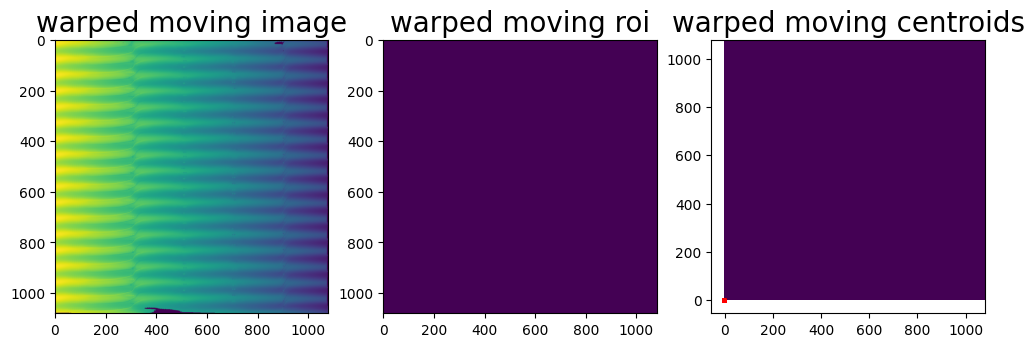

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
if len(warped_moving_image.shape) == 2:
    axes[0].imshow(warped_moving_image);
else:
    axes[0].imshow(warped_moving_image.max(2));
axes[0].set_title("warped moving image", fontsize=20);
axes[1].imshow(warped_moving_roi.max(2));
axes[1].set_title("warped moving roi", fontsize=20);

axes[2].imshow(warped_moving_roi.max(2));
axes[2].set_title("warped moving roi", fontsize=20);

xs = [x for (x, _, _) in warped_moving_centroids]
ys = [y for (_, y, _) in warped_moving_centroids]


axes[2].scatter(ys, xs, s=5, c='r');
axes[2].set_title("warped moving centroids", fontsize=20);
# axes[2].set_xlim(0, 120);
# axes[2].set_ylim(0, 284);
axes[2].invert_yaxis()

In [12]:
import h5py
test_path = "/home/brian/data4/brian/PBnJ/test_data/stripes"

with h5py.File(os.path.join(test_path, "moving_images.h5"), 'r') as f:
    mov_img = f[registration_prob][:]

with h5py.File(os.path.join(test_path, "fixed_images.h5"), 'r') as f:
    fix_img = f[registration_prob][:]


with h5py.File(os.path.join(test_path, "fixed_labels.h5"), 'r') as f:
    fix_labs = f[registration_prob][:]

Text(0.5, 1.0, 'fixed image')

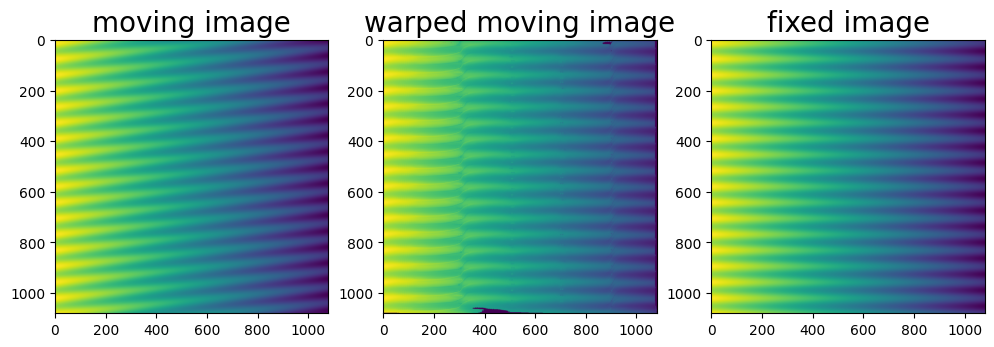

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
if len(warped_moving_image.shape) == 2:
    axes[0].imshow(mov_img)
else:
    axes[0].imshow(mov_img.max(2))
axes[0].set_title("moving image", fontsize=20)
if len(warped_moving_image.shape) == 2:
    axes[1].imshow(warped_moving_image)
else:
    axes[1].imshow(warped_moving_image[...,1])
axes[1].set_title("warped moving image", fontsize=20)

if len(warped_moving_image.shape) == 2:
    axes[2].imshow(fix_img)
else:
    axes[2].imshow(fix_img.max(2))

xs = [x for (x, _, _) in warped_moving_centroids]
ys = [y for (_, y, _) in warped_moving_centroids]


# axes[1].scatter(ys, xs, s=5, c='r')


xs = [x for (x, _, _) in fix_labs if x >= 0]
ys = [y for (_, y, _) in fix_labs if y >= 0]

axes[2].set_title("fixed image", fontsize=20)
# axes[2].scatter(xs, ys, s=5, c='g')
# axes[2].set_xlim(0, 120)
# axes[2].set_ylim(0, 284)
# axes[1].invert_yaxis()
# axes[2].invert_yaxis()